# Random Walk Generation

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

In [1]:
import numpy as np
import pandas as pd

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    GBM is for Geometric Brownian Model. Steps_per_year represents dt.
    Evolution of a Stock Price using GBM.
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # We want to make sure it's an integer, a round number.
    xi = np.random.normal(size=(n_steps, n_scenarios)) # size=(row, columns)
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0*(1+rets).cumprod()
    return prices

In [3]:
p = gbm(10, n_scenarios=3)

In [5]:
p

,0,1,2
0,98.876776,110.839550,104.602286
1,104.217319,108.779269,105.257418
2,102.787801,109.639014,106.951091
3,98.984500,106.470679,111.350648
4,105.055994,106.332977,118.554318
...,...,...,...
115,132.458172,281.531346,139.427491
116,141.494165,283.741499,140.246551
117,139.421105,265.231101,141.117204
118,145.554492,273.275127,145.243929


<AxesSubplot:>

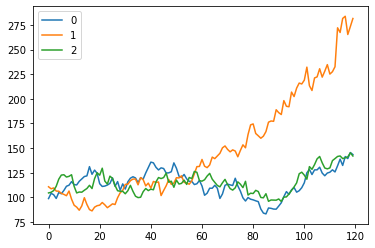

In [6]:
p.plot()

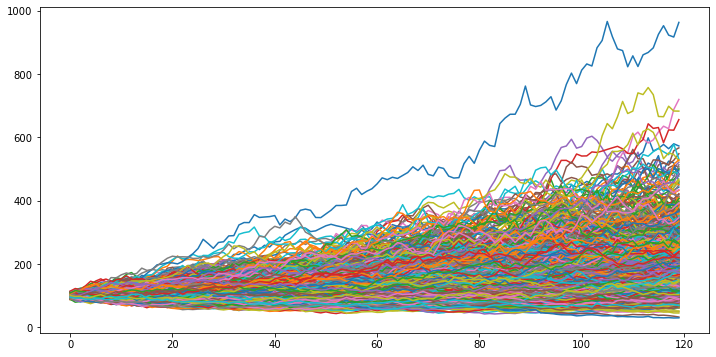

In [7]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)
# The plot takes to much time !!!

In [9]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    GBM is for Geometric Brownian Model. Steps_per_year represents dt.
    Evolution of a Stock Price using GBM.
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # We want to make sure it's an integer, a round number.
    xi = np.random.normal(size=(n_steps, n_scenarios)) # size=(row, columns)
    rets = mu*dt + sigma*np.sqrt(dt)*xi # xi is a matrix, therefore we have an embeeded loop.
    # Since xi is multiplying sigma and square root of dt, xi is effectively scaling these variables.
    # We can do it directly during the generation of the random variables in xi.
    # 
    rets = pd.DataFrame(rets)
    prices = s_0*(1+rets).cumprod() #We are using 1+rets, creating another embeeded loop.
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    GBM is for Geometric Brownian Model. Steps_per_year represents dt.
    Evolution of a Stock Price using GBM.
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # We want to make sure it's an integer, a round number.
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios)) # size=(row, columns)
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [13]:
%timeit gbm0(n_years=5, n_scenarios=100000)

219 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit gbm1(n_years=5, n_scenarios=100000)

183 ms ± 984 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<AxesSubplot:>

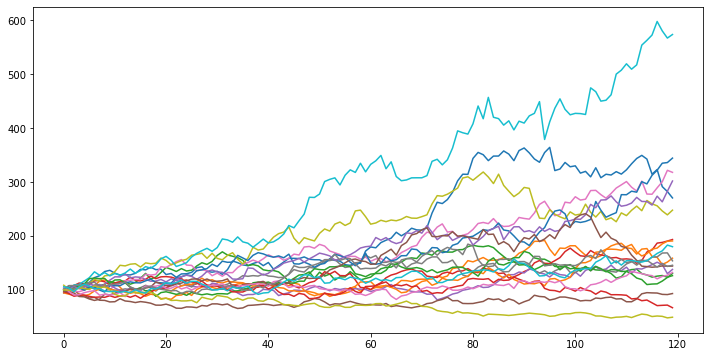

In [16]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [17]:
# Problem, at time 0, prices do not start at 100.

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    GBM is for Geometric Brownian Model. Steps_per_year represents dt.
    Evolution of a Stock Price using GBM.
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # We want to make sure it's an integer, a round number.
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios)) # size=(row, columns)
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

<AxesSubplot:>

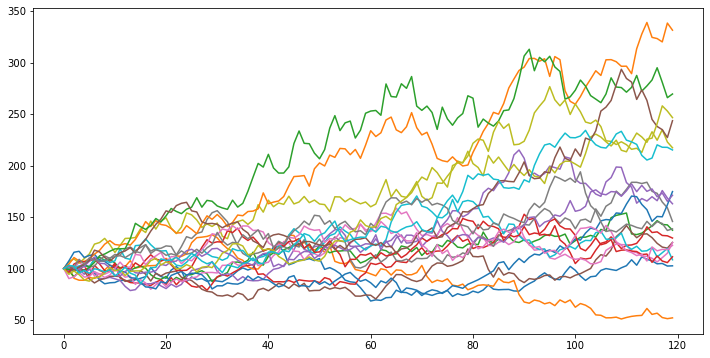

In [18]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))